In [1]:

import cv2
from PIL import Image

def mark_region(image_path):
    
    image = cv2.imread(image_path)

    # define threshold of regions to ignore
    THRESHOLD_REGION_IGNORE = 40

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        
        if w < THRESHOLD_REGION_IGNORE or h < THRESHOLD_REGION_IGNORE:
            continue
        
        image = cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (x+w, y+h)])


    return image, line_items_coordinates

In [2]:
from pdf2image import convert_from_path

images = convert_from_path(pdf_path='Data Source PDF/BCA.pdf', dpi=350)

for page, img in enumerate(images, start=1):
    img.save(f'PDF Image\page{page + 1}.jpg', 'JPEG')

In [3]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

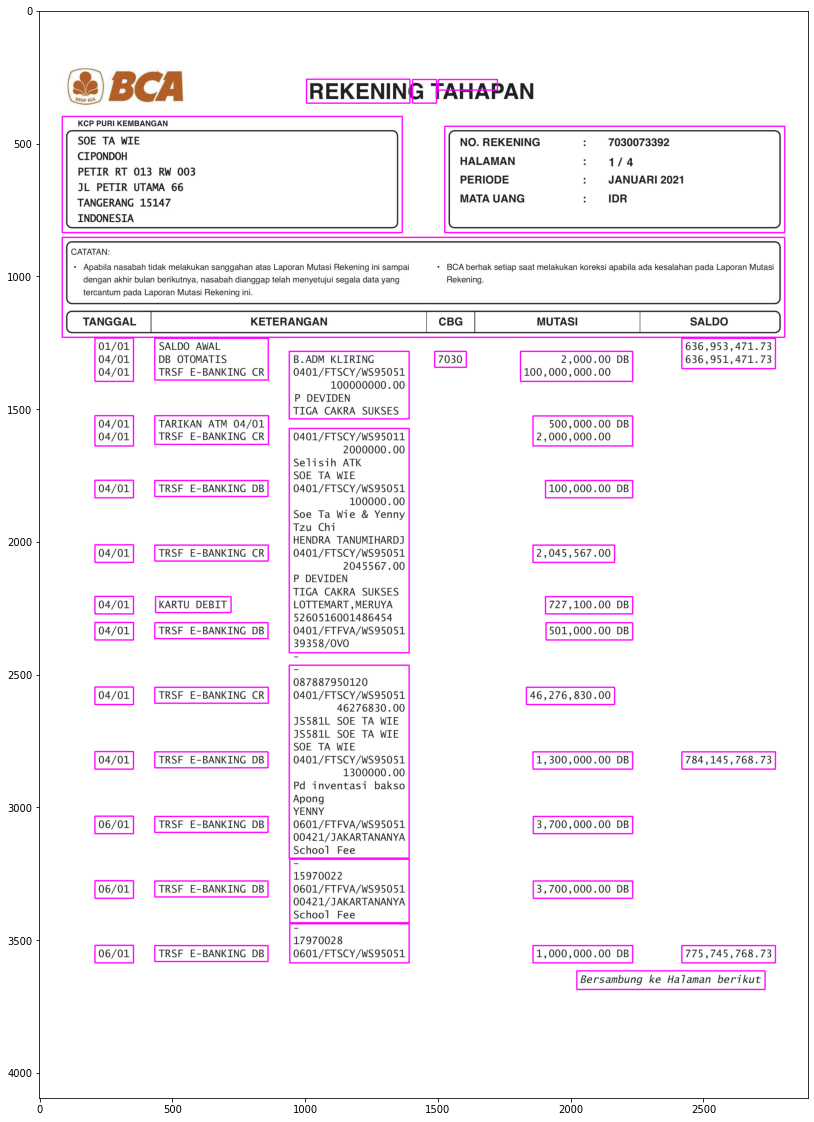

In [4]:
from matplotlib import pyplot as plt
import os

# Image to be extreacted
img_path = os.path.join('.', 'PDF Image\page1.jpg')

# Draw annotations on image
image, line_items_coordinates = mark_region(img_path)

# Resizing display area
plt.figure(figsize=(20,20))

# Show the image using matplotlib
plt.imshow(image)

# Save annotated image
plt.savefig("Bounding Images/result.jpg")

In [5]:
import cv2

# # load the original image
# image = cv2.imread(img_path)

# # get co-ordinates to crop the image
# c = line_items_coordinates[1]

# # cropping image img = image[y0:y1, x0:x1]
# img = image[c[0][1]:c[1][1], c[0][0]:c[1][0]]    

# plt.figure(figsize=(10,10))
# plt.imshow(img)

# convert the image to black and white for better OCR
ret, thresh1 = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
cv2
# pytesseract image to string to get results
text = str(pytesseract.image_to_string(thresh1, config='--psm 6'))
print(text)

* BCA REKENING TAHAPAN
KCP PUR! KEMBANGAN
SOE TA WIE NO. REKENING : 7030073392
PETIR RT 013 RW 003 HALAMAN v4
JL PETIR UTAMA 66 PERIODE : JANUARI 2021
TANGERANG 15147 MATA UANG : IDR
INDONESIA
CATATAN:
+ Apabila nasabah tidak melakukan sanggahan atas Laporan Mutasi Rekening ini sampai + BCA berhak setiap saat melakukan koreksi apabila ada kesalahan pada Laporan Mutasi
dengan akhir bulan berikutnya, nasabah dianggap telah menyetujui segala data yang Rekening.
tercantum pada Laporan Mutasi Rekening ini.
01/01 SALDO AWAL 636,953,471. 73
04/01| |DB OTOMATIS B.ADM KLIRING 2,000.00 DB 636,951, 471.73
04/01 TRSF E-BANKING CR 0401/FTSCY/WS95051 100, 000,000.00
100000000. 00
P DEVIDEN
TIGA CAKRA SUKSES
04/01 TARIKAN ATM 04/01 500,000.00 DB
04/01 TRSF E-BANKING CR 0401/FTSCY/WS95011 2,000, 000.00
2000000. 00
Selisih ATK
SOE TA WIE
0401/FTSCY/WS95051
100000. 00
Soe Ta Wie & Yenny
Tzu Chi
HENDRA TANUMIHARDJ
0401/FTSCY/WS95051
2045567.00
P DEVIDEN
TIGA CAKRA SUKSES
LOTTEMART , MERUYA
52605160014864